In [1]:
%matplotlib inline
from copy import deepcopy as copy
import json
import os

import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from scipy.ndimage import gaussian_filter1d as smooth

from aux import sgmd, get_segments
from disp import set_font_size
from replay import smln, plot

cc = np.concatenate


FILE = 'PARAM_SWEEP_RESULTS_0_W_PC_PC_L_PC_PC_test.txt'

# load header data and smln results
with open(FILE, 'r') as f:
    
    tmp = json.loads(f.readline())
    
    SWEEP_PARAMS = tmp['SWEEP_PARAMS']
    M_PARAMS = tmp['M_PARAMS']
    S_PARAMS = tmp['S_PARAMS']
    A_PARAMS = tmp['A_PARAMS']
    
    rslts = [json.loads(l) for l in f.readlines()[1:]]
    
PARAM_0 = SWEEP_PARAMS['VARY'][0]
PARAM_1 = SWEEP_PARAMS['VARY'][1]

# Event and unidirectional replay count

MIN EVT CT =  0.0
MAX EVT CT =  39.3


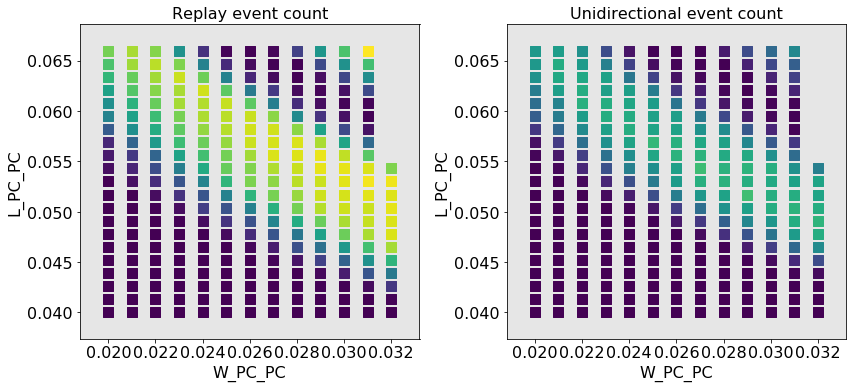

In [2]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5.5), tight_layout=True)

# event count
ax = axs[0]

def extract(metrics):
    return np.mean([v['evt_ct'] for v in metrics.values()])

x_min = np.min([rslt['PARAMS'][PARAM_0] for rslt in rslts])
x_max = np.max([rslt['PARAMS'][PARAM_0] for rslt in rslts])
x_range = x_max - x_min

y_min = np.min([rslt['PARAMS'][PARAM_1] for rslt in rslts])
y_max = np.max([rslt['PARAMS'][PARAM_1] for rslt in rslts])
y_range = y_max - y_min

v_min = np.min([extract(rslt['METRICS']) for rslt in rslts])
v_max = np.max([extract(rslt['METRICS']) for rslt in rslts])

print('MIN EVT CT = ', v_min)
print('MAX EVT CT = ', v_max)

# make scatter plot
for rslt in rslts:
    x = rslt['PARAMS'][PARAM_0]
    y = rslt['PARAMS'][PARAM_1]
    ax.scatter(x, y, c=extract(rslt['METRICS']), s=100, vmin=v_min, vmax=v_max, marker='s')
    
ax.set_xlim(x_min - .1*x_range, x_max + .1*x_range)
ax.set_ylim(y_min - .1*y_range, y_max + .1*y_range)
ax.set_xlabel(PARAM_0)
ax.set_ylabel(PARAM_1)
ax.set_facecolor((.9, .9, .9))
ax.set_title('Replay event count')

set_font_size(ax, 16)

# one way count
ax = axs[1]

def extract(metrics):
    return np.mean([v['one_way_ct'] for v in metrics.values()])

x_min = np.min([rslt['PARAMS'][PARAM_0] for rslt in rslts])
x_max = np.max([rslt['PARAMS'][PARAM_0] for rslt in rslts])
x_range = x_max - x_min

y_min = np.min([rslt['PARAMS'][PARAM_1] for rslt in rslts])
y_max = np.max([rslt['PARAMS'][PARAM_1] for rslt in rslts])
y_range = y_max - y_min

# make scatter plot
for rslt in rslts:
    x = rslt['PARAMS'][PARAM_0]
    y = rslt['PARAMS'][PARAM_1]
    ax.scatter(x, y, c=extract(rslt['METRICS']), s=100, vmin=v_min, vmax=v_max, marker='s')
    
ax.set_xlim(x_min - .1*x_range, x_max + .1*x_range)
ax.set_ylim(y_min - .1*y_range, y_max + .1*y_range)
ax.set_xlabel(PARAM_0)
ax.set_ylabel(PARAM_1)
ax.set_facecolor((.9, .9, .9))
ax.set_title('Unidirectional event count')

set_font_size(ax, 16)

# Trajectory/non-trajectory cells active during candidate replay events

MIN FR_TRJ =  3.260088625832908
MAX FR_TRJ =  10.354763748777035
MIN FR_NTRJ =  0.0338723754625457
MAX FR_NTRJ =  8.24080650367972


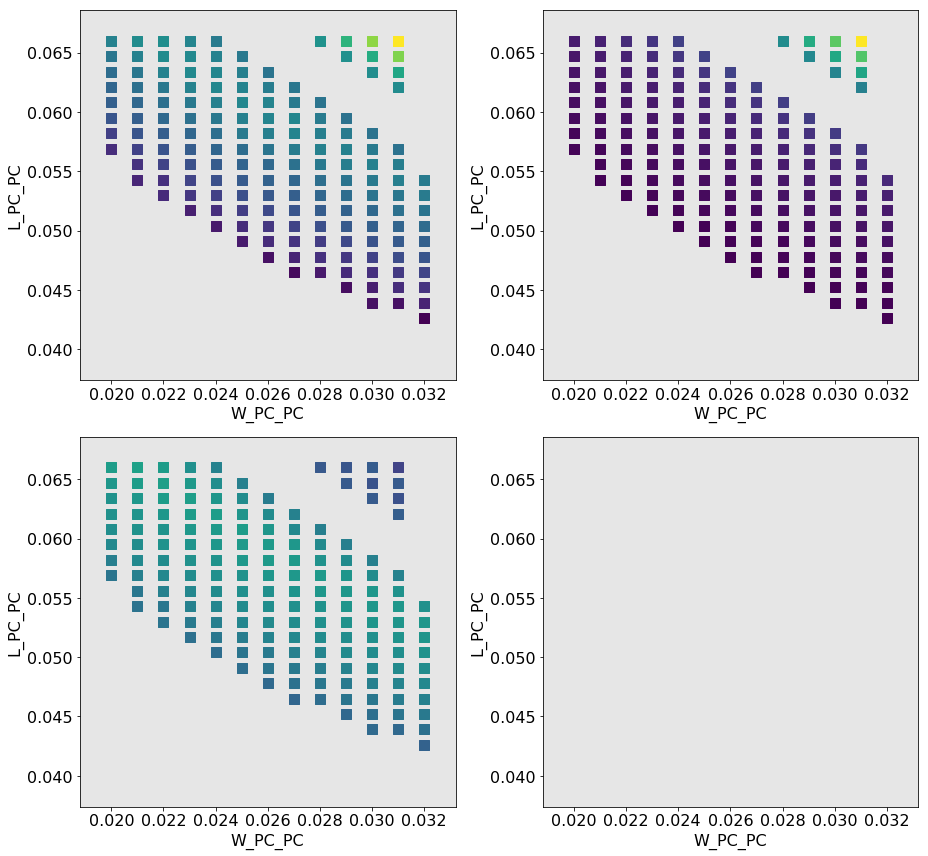

In [3]:
MIN_EVT_CT = 3

def extract(metrics):
    
    if np.mean([v['evt_ct'] for v in metrics.values()]) > MIN_EVT_CT:
        
        tmp = [v['fr_trj'] for v in metrics.values() if v['evt_ct'] > 3]
        fr_trj = np.mean(tmp) if tmp else np.nan
        
        tmp = [v['fr_ntrj'] for v in metrics.values() if v['evt_ct'] > 3]
        fr_ntrj = np.mean(tmp) if tmp else np.nan
        
        return fr_trj, fr_ntrj
    else:
        return np.nan, np.nan
    

x_min = np.min([rslt['PARAMS'][PARAM_0] for rslt in rslts])
x_max = np.max([rslt['PARAMS'][PARAM_0] for rslt in rslts])
x_range = x_max - x_min

y_min = np.min([rslt['PARAMS'][PARAM_1] for rslt in rslts])
y_max = np.max([rslt['PARAMS'][PARAM_1] for rslt in rslts])
y_range = y_max - y_min

v_min_0 = np.nanmin([extract(rslt['METRICS'])[0] for rslt in rslts])
v_max_0 = np.nanmax([extract(rslt['METRICS'])[0] for rslt in rslts])

v_min_1 = np.nanmin([extract(rslt['METRICS'])[1] for rslt in rslts])
v_max_1 = np.nanmax([extract(rslt['METRICS'])[1] for rslt in rslts])

print('MIN FR_TRJ = ', v_min_0)
print('MAX FR_TRJ = ', v_max_0)
print('MIN FR_NTRJ = ', v_min_1)
print('MAX FR_NTRJ = ', v_max_1)

# make scatter plot
fig, axs = plt.subplots(2, 2, figsize=(13, 12), tight_layout=True)
for rslt in rslts:
    x = rslt['PARAMS'][PARAM_0]
    y = rslt['PARAMS'][PARAM_1]
    fr_trj, fr_ntrj = extract(rslt['METRICS'])
    axs[0, 0].scatter(x, y, c=fr_trj, s=100, vmin=v_min_0, vmax=v_max_0, marker='s')
    axs[0, 1].scatter(x, y, c=fr_ntrj, s=100, vmin=v_min_1, vmax=v_max_1, marker='s')
    
    axs[1, 0].scatter(x, y, c=(fr_trj - fr_ntrj), s=100, vmin=v_min_1, vmax=v_max_0, marker='s')

for ax in axs.flatten():
    ax.set_xlim(x_min - .1*x_range, x_max + .1*x_range)
    ax.set_ylim(y_min - .1*y_range, y_max + .1*y_range)
    ax.set_xlabel(PARAM_0)
    ax.set_ylabel(PARAM_1)
    ax.set_facecolor((.9, .9, .9))

    set_font_size(ax, 16)

## Analysis function definitions
(Copy/pasted from 3A.)

In [4]:
def remove_short_gaps(starts, ends, min_gap):
    """Remove short gaps from list of starts and end times denoting events."""
    gaps = starts[1:] - ends[:-1]  # get gap times (n-1 gaps for n starts and ends)
    mask = gaps >= min_gap  # find all sufficiently long gaps (len n-1)
    
    # convert to proper length mask to select corrected starts and ends
    return starts[cc([[True], mask])], ends[cc([mask, [True]])]


def remove_short_evts(starts, ends, min_evt):
    """Remove short events from list of starts and end times denoting events."""
    mask = (ends - starts) >= min_evt
    return starts[mask], ends[mask]


def get_evts(rslt, a_params):
    """Return start and end times of candidate replay events."""
    # get PC firing rates
    ## PC spks
    spks_pc = rslt.spks[:, :rslt.p['N_PC']]
    
    ## smoothed instantaneous firing rate avg'd over PCs
    fr_pc = smooth(spks_pc.sum(axis=1) / (rslt.dt * rslt.p['N_PC']), a_params['SMOOTH_FR'])
    
    # get start and end time idxs when PC FR is above threshold
    starts, ends = get_segments(fr_pc >= a_params['EVT_DTCN_TH'])
    
    # convert to time
    starts = starts.astype(float) * rslt.dt
    ends = ends.astype(float) * rslt.dt

    # remove too-short gaps btwn events
    if len(starts) > 0:
        starts, ends = remove_short_gaps(starts, ends, a_params['MIN_GAP_DUR'])
    
    # remove too-short events
    if len(starts) > 0:
        starts, ends = remove_short_evts(starts, ends, a_params['MIN_EVT_DUR'])
    
    # remove all events that start before min start time
    if len(starts):
        mask = starts > a_params['MIN_START']
        starts = starts[mask]
        ends = ends[mask]
        
    # remove final event if it hits end of smln
    if len(ends) and ends[-1] >= rslt.ts[-1]:
        starts = starts[:-1]
        ends = ends[:-1]
        
    return starts, ends
    

def get_fr_trj_ntrj(rslt, start, end, a_params):
    """Check whether event exhibits "blowup" behavior."""
    # get spks during candidate replay event
    spks_evt = rslt.spks[(start <= rslt.ts) & (rslt.ts < end), :]
    
    # get mask over trj and non-trj PCs
    pc_mask = rslt.ntwk.types_rcr == 'PC'
    
    sgm_cutoff = .5 * (1 + m_params['SGM_MAX'])
    
    trj_mask = (rslt.ntwk.sgm * pc_mask.astype(float)) > sgm_cutoff
    ntrj_mask = (~trj_mask) & pc_mask

    # get trj-PC spks
    spks_trj = spks_evt[:, trj_mask]
    fr_trj = (spks_trj.sum(0) / (end - start)).mean()
    
    # get non-trj-PC spks
    spks_ntrj = spks_evt[:, ntrj_mask]
    fr_ntrj = (spks_ntrj.sum(0) / (end - start)).mean()
    
    # return trj-PC and non-trj-PC firing rates
    return fr_trj, fr_ntrj


def get_pos_t_corr(rslt, start, end, a_params):
    """Check whether event exhibits one-way propagation."""
    # get evt spks
    t_mask = (start <= rslt.ts) & (rslt.ts < end)
    spks_evt = rslt.spks[t_mask, :]
    
    # get trj-PC spks
    ## make masks
    pc_mask = rslt.ntwk.types_rcr == 'PC'
    
    sgm_cutoff = .5 * (1 + rslt.p['SGM_MAX'])
    
    trj_mask = (rslt.ntwk.sgm * pc_mask.astype(float)) > sgm_cutoff
    ntrj_mask = (~trj_mask) & pc_mask
    
    ## apply masks
    spks_trj = spks_evt[:, trj_mask]
    spks_ntrj = spks_evt[:, ntrj_mask]
    
    ## get mask over trj PCs that spiked
    trj_spk_mask = trj_mask & (rslt.spks[t_mask].sum(0) > 0.5)
    
    ## order nrns by place field location along trj
    pfxs = rslt.ntwk.pfxs
    pfys = rslt.ntwk.pfys
    
    ### get pos of spk'ing trj PCs along trj
    pf_dists, pf_order = smln.dist_to_trj(
        pfxs[trj_spk_mask], pfys[trj_spk_mask], rslt.trj['x'], rslt.trj['y'])
    
    ## get order spks occurred in
    spk_order = spks_evt[:, trj_spk_mask].argmax(0)
    
    ## return correlation btwn spk order and pos along trj
    return stats.spearmanr(pf_order, spk_order)[0]

    
def get_metrics(rslt, a_params):
    """
    Compute metrics from network simulation run:
        (1) evt_ct: spontaneous event frequency
        (2) evt_dur: avg spontaneous event duration
        (3) class: blowup, replay (unidirectional), or other
        (4) speed: virtual replay speed
    """
    metrics = {}
    
    # get candidate replay event start and end times
    starts, ends = get_evts(rslt, a_params)
    
    # calc event freq
    metrics['evt_ct'] = int(len(starts))
    
    # calc mean event dur
    metrics['evt_dur'] = np.mean(ends - starts) if len(starts) else -1
    
    ## calc avg event stats
    frs_trj = []
    frs_ntrj = []
    pos_t_corrs = []
    
    for start, end in zip(starts, ends):
        # trj- and non-trj-PC firing rates
        fr_trj, fr_ntrj = get_fr_trj_ntrj(rslt, start, end, a_params)
        frs_trj.append(fr_trj)
        frs_ntrj.append(fr_ntrj)
        
        # position-spk-time rank corr
        pos_t_corr = get_pos_t_corr(rslt, start, end, a_params)
        pos_t_corrs.append(np.abs(pos_t_corr))
    
    metrics['fr_trj'] = np.mean(frs_trj) if len(starts) else -1
    metrics['fr_ntrj'] = np.mean(frs_ntrj) if len(starts) else -1
    
    # count num one-way replay events
    metrics['one_way_ct'] = int(np.sum(np.array(pos_t_corrs) > a_params['POS_T_CORR_TH']))
    
    return metrics

# Test rerunning smln exactly

In [5]:
SMLN_ID = 100
RNG_SEED = 1

m_params = copy(M_PARAMS)
s_params = copy(S_PARAMS)

rslt = rslts[SMLN_ID]
assert rslt['SMLN_ID'] == SMLN_ID

m_params[PARAM_0] = rslt['PARAMS'][PARAM_0]
m_params[PARAM_1] = rslt['PARAMS'][PARAM_1]
s_params['RNG_SEED'] = RNG_SEED

print('Running smln...')
rslt_rerun = smln.run(m_params, s_params)
print('Smln complete.')

print('Desired metrics:')
print(rslt['METRICS'][str(RNG_SEED)])
print('Actual metrics:')
print(get_metrics(rslt_rerun, A_PARAMS))

Running smln...
Smln complete.
Desired metrics:
{'evt_ct': 37, 'one_way_ct': 22, 'evt_dur': 0.12400000000000003, 'fr_ntrj': 0.7046107540886237, 'fr_trj': 6.415377719208685}
Actual metrics:
{'evt_ct': 37, 'fr_trj': 6.415377719208685, 'evt_dur': 0.12400000000000003, 'one_way_ct': 22, 'fr_ntrj': 0.7046107540886237}
